# Uk Financial Trends Aggregate

Data aggregation of:

- Inflation Rates (Consumer Price Index)
- House Prices
- Bitcoin (in GBP)
- Gold Prices (in GBP)
- FTSE 100
- Money Supply


### Import Modules

In [175]:
#Dataframes & datetime
import pandas as pd
from datetime import datetime
#Visualisation
import matplotlib.pyplot as plt

#For stocks & gold prices
import yfinance as yf

#For inflation and house prices
from SPARQLWrapper import SPARQLWrapper, JSON
import sparql_dataframe



### Set Date Range

In [189]:
enddate = datetime.today().strftime("%Y-%m-%d")
startdate = "2016-01-01"
print(startdate)
print(enddate)


2016-01-01
2022-01-09


## House Price Index

Query [HM Land Registry Open Data](https://landregistry.data.gov.uk/app/qonsole#)

In [188]:
endpoint = "http://landregistry.data.gov.uk/landregistry/query"

q = """
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    prefix owl: <http://www.w3.org/2002/07/owl#>
    prefix xsd: <http://www.w3.org/2001/XMLSchema#>
    prefix sr: <http://data.ordnancesurvey.co.uk/ontology/spatialrelations/>
    prefix ukhpi: <http://landregistry.data.gov.uk/def/ukhpi/>
    prefix lrppi: <http://landregistry.data.gov.uk/def/ppi/>
    prefix skos: <http://www.w3.org/2004/02/skos/core#>
    prefix lrcommon: <http://landregistry.data.gov.uk/def/common/>

    # House price index for all regions within a given date range
    SELECT ?region ?date ?hpi ?percent
    {
    ?region ukhpi:refPeriodStart ?date ;
             ukhpi:housePriceIndex ?hpi ;
             ukhpi:percentageChange ?percent
    FILTER (
        ?date > "2016-01-01"^^xsd:date &&
        ?date < "2021-12-31"^^xsd:date
    )
    }
    
"""

df = sparql_dataframe.get(endpoint, q)
df.sort_values('date')


,region,date,hpi,percent
19517,http://landregistry.data.gov.uk/data/ukhpi/reg...,2016-02-01,91.49,-1.89
19326,http://landregistry.data.gov.uk/data/ukhpi/reg...,2016-02-01,102.61,-2.02
23289,http://landregistry.data.gov.uk/data/ukhpi/reg...,2016-02-01,103.57,-0.73
26142,http://landregistry.data.gov.uk/data/ukhpi/reg...,2016-02-01,106.63,-0.32
9305,http://landregistry.data.gov.uk/data/ukhpi/reg...,2016-02-01,114.35,0.98
...,...,...,...,...
17716,http://landregistry.data.gov.uk/data/ukhpi/reg...,2021-10-01,145.87,3.85
17717,http://landregistry.data.gov.uk/data/ukhpi/reg...,2021-10-01,151.28,3.85
23402,http://landregistry.data.gov.uk/data/ukhpi/reg...,2021-10-01,143.86,-0.72
17565,http://landregistry.data.gov.uk/data/ukhpi/reg...,2021-10-01,140.78,3.55


## Gold Price in GBP

Querying Yahoo finance for GLD and then currency converting using yahoo finance GBP/USD exchange rate
Normalised into percentage change

[*********************100%***********************]  2 of 2 completed


(0.0, 0.725206291895021)

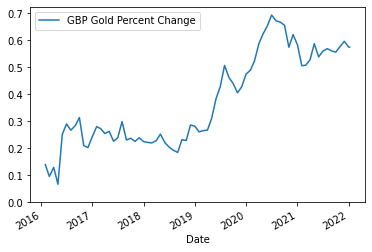

In [190]:
# Get the data for Gold and GBP
data = yf.download(['GLD','GBPUSD=X'],startdate,enddate, interval="1mo")
df = pd.DataFrame(data['Adj Close']).reset_index()


df['GBP Gold']= df['GLD']/df['GBPUSD=X']
df['GBP Gold Percent Change'] = df['GBP Gold'].pct_change().cumsum()

df.plot(x='Date', y = 'GBP Gold Percent Change')
plt.ylim(ymin=0)

## FTSE 100

Normalising Yahoo finance ^FTSE into percentage change

[*********************100%***********************]  1 of 1 completed


(0.0, 0.27213132165501197)

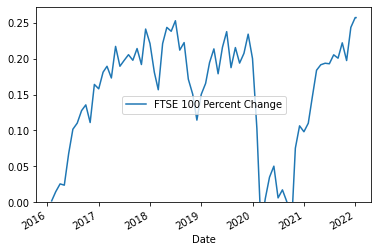

In [191]:

data = yf.download(['^FTSE'],startdate,enddate, interval="1mo")
df = pd.DataFrame(data['Adj Close']).reset_index()


df['FTSE 100 Percent Change']=df['Adj Close'].pct_change().cumsum()

df.plot(x='Date', y = 'FTSE 100 Percent Change')
plt.ylim(ymin=0)

## Bitcoin in GBP

Normalising Yahoo finance BTC-GBP into percentage change

[*********************100%***********************]  1 of 1 completed


(0.0, 7.515716491075618)

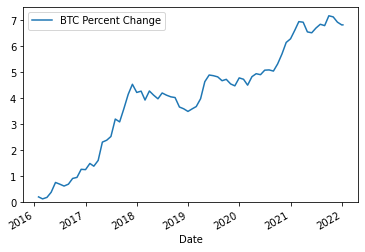

In [192]:

data = yf.download(['BTC-GBP'],startdate,enddate, interval="1mo")
df = pd.DataFrame(data['Adj Close']).reset_index()


df['BTC Percent Change']=df['Adj Close'].pct_change().cumsum()

df.plot(x='Date', y = 'BTC Percent Change')
plt.ylim(ymin=0)